This file is  intended to perform experiments, like visualisations...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re

# load  to mem times

In [2]:
memlooadfiles = glob.glob("./data/latency/latency_memload*")
uninloadfiles =  glob.glob("./data/latency/latency_unin*")

timingLoadPerMB ={
}

for filesName in memlooadfiles:
    pdframe = pd.read_csv(filesName,header=None,names=["times"])
    timingsarray  =  np.array(pdframe["times"])
    lowerb, upperbound =  np.percentile(timingsarray,[5,95])
    perclist = [x for x in timingsarray if lowerb < x <  upperbound]
    memory = int(re.sub("[^0-9]", "", filesName))
    timingLoadPerMB[memory] = np.array(perclist)


timingUninPerMB ={
}

for filesName in uninloadfiles:
    pdframe = pd.read_csv(filesName,header=None,names=["times"])
    timingsarray  =  np.array(pdframe["times"])
    lowerb, upperbound =  np.percentile(timingsarray,[5,95])
    perclist = [x for x in timingsarray if lowerb < x <  upperbound]
    memory = int(re.sub("[^0-9]", "", filesName))
    timingUninPerMB[memory] = np.array(perclist)



In [23]:
print("loads")
for  key,item in timingLoadPerMB.items():
    print(key,len(item))
print("unin")
for  key,item in timingUninPerMB.items():
    print(key,len(item))


loads
51183616 98
15204352 120
10223616 96
26214400 109
91226112 81
2228224 97
1245184 142
5242880 106
unin
51183616 162
15204352 191
2228224 165
10223616 161
5242880 176
26214400 180
1245184 241
91226112 150


In [6]:
xvalues =  [ 1,  2,  5, 10, 15, 25, 50, 90]

array([ 1,  2,  5, 10, 15, 26, 51, 91])

{'min': [3.233924, 4.183275999999999, 12.593359999999999, 19.816653, 29.082285, 59.339596, 94.094163, 149.63966100000002], 'mean': [9.300268352112676, 12.172816536082475, 32.301629594339616, 46.908506010416666, 61.570698291666666, 97.54343120183484, 135.28031047959186, 195.01451072839504], 'max': [14.810258999999999, 22.637217, 48.603359, 77.89968, 107.959468, 180.246875, 274.833027, 352.939343]}


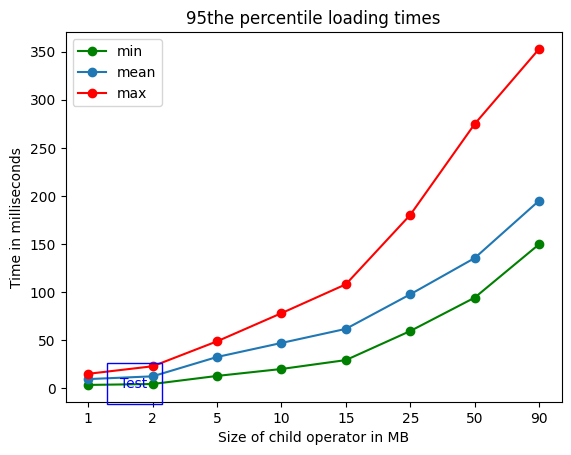

In [8]:
xvalues = []
yvalues  ={
    "min":[],
    "mean":[],
    "max":[]
}
for  key,item in sorted(timingLoadPerMB.items()):
    xvalues.append(key)
    yvalues["max"].append(np.max(item)*1000)
    yvalues["mean"].append(np.mean(item)*1000)
    yvalues["min"].append(np.min(item)*1000)

fig, ax = plt.subplots()
xvalues  =  [ 1,  2,  5, 10, 15, 25, 50, 90]
plt.title("95the percentile loading times")
plt.ylabel("Time in milliseconds")
plt.xlabel("Size of child operator in MB")
xi = list(range(len(xvalues)))
plt.xticks(xi, xvalues)
plt.plot(xi,yvalues["min"],label = "min", marker ='o', color = "green")
plt.plot(xi,yvalues["mean"],label = "mean", marker ='o')
plt.plot(xi,yvalues["max"],label = "max", marker ='o',color = "red")

ax.text(0.5, 0.6, 'Test', 
        bbox=dict(facecolor='none', edgecolor='blue', pad=10.0))
print(yvalues)


plt.legend()
plt.show()


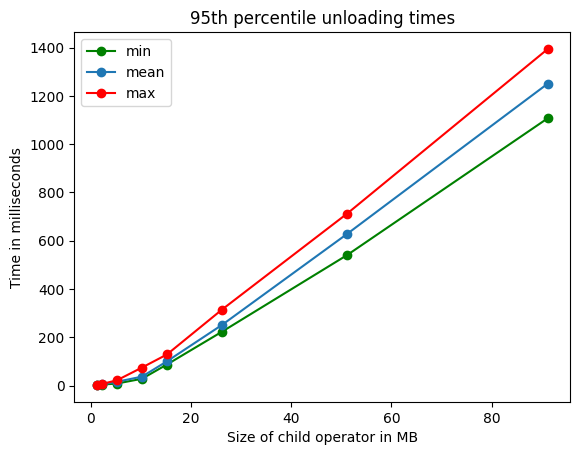

{'min': [3.2773, 4.587846, 9.093956, 28.708834, 87.731605, 223.79170200000002, 541.087858, 1107.601157], 'mean': [3.9285631452282153, 5.460813012121212, 16.460153, 37.50232511180125, 100.94715826178012, 251.85961099999997, 628.6685665864197, 1250.8370690466666], 'max': [4.860528, 7.062779, 22.588789000000002, 75.083961, 129.256374, 315.440973, 712.7510980000001, 1394.317113]}


In [33]:
xvalues = []
yvalues  ={
    "min":[],
    "mean":[],
    "max":[]
}
for  key,item in sorted(timingUninPerMB.items()):
    xvalues.append(key)
    yvalues["max"].append(np.max(item)*1000)
    yvalues["mean"].append(np.mean(item)*1000)
    yvalues["min"].append(np.min(item)*1000)


xvalues = np.array(xvalues)/1000000
plt.title("95th percentile unloading times")
plt.ylabel("Time in milliseconds")
plt.xlabel("Size of child operator in MB")
plt.plot(xvalues,yvalues["min"],label = "min", marker ='o', color = "green")
plt.plot(xvalues,yvalues["mean"],label = "mean", marker ='o')
plt.plot(xvalues,yvalues["max"],label = "max", marker ='o',color = "red")

plt.legend()
plt.show()
print(yvalues)
